## 1- Implement Logistic Regression from scratch - Python (5 Marks)
Ref: https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148

In [59]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings( "ignore" )
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression

from numpy import log,dot,e,shape
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [83]:
accuracy_score,
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

class Logistic_Regression:
    def __init__(self, lr=0.01, num_iter=1000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            if(self.verbose == True and i % 10000 == 0):
                z = np.dot(X, self.theta)
                h = self.__sigmoid(z)
                print(f'loss: {self.__loss(h, y)} \t')
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X, threshold):
        return self.predict_prob(X) >= threshold



## 2- (5 Marks)
In this task, you'll be working with the heart attack dataset (https://www.kaggle.com/nareshbhat/health-care-data-set-on-heart-attack-possibility)

   * Propose at least 2 questions about the dataset. 
   * Use visualizations and relations between variables to support your analysis in answering these questions. 
   * Perform any necessary cleaning steps. 
   * Fit a logistic regression model. 
   * Report model performance.
   * iscuss your findings and observations. 
   * scuss dataset limitations. 
   * organize yhe notebooks with detailed analysis and logical flow of conclusions.
   * Evaluate your logistic regression model.
   * Comment on each score and indicate whether or not you think the used metric is suitable for this particular problem. 




        1.   Does age have an impact on the likelihood of developing heart disease?

        2.   Is there a correlation between cholesterol levels and the development of heart disease? 






### EDA 

In [57]:
# load the data set
data = pd.read_csv('/content/drive/MyDrive/ML data-s/heart.csv')

# check for missing values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [66]:
# check for inconsistent data
print(data['sex'].unique())
data['sex'].replace(['male', 'female'], [1, 0], inplace=True)

[1 0]


In [67]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [74]:
dict = {}
for i in list(data.columns):
    dict[i] = data[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
age,41
sex,2
cp,4
trestbps,49
chol,152
fbs,2
restecg,3
thalach,91
exang,2
oldpeak,40


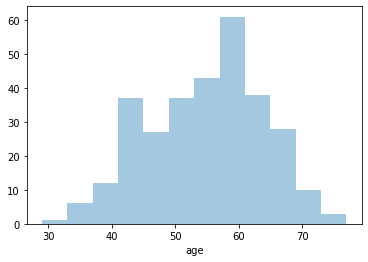

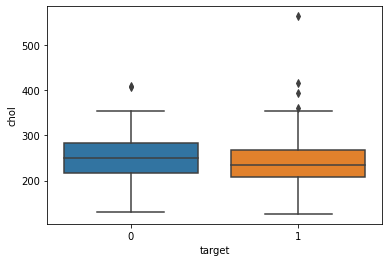

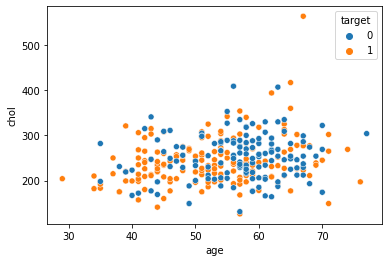

In [60]:
# age distribution
sns.distplot(data['age'], kde=False)
plt.show()

# cholesterol levels
sns.boxplot(x='target', y='chol', data=data)
plt.show()

# age vs cholesterol levels
sns.scatterplot(x='age', y='chol', hue='target', data=data)
plt.show()


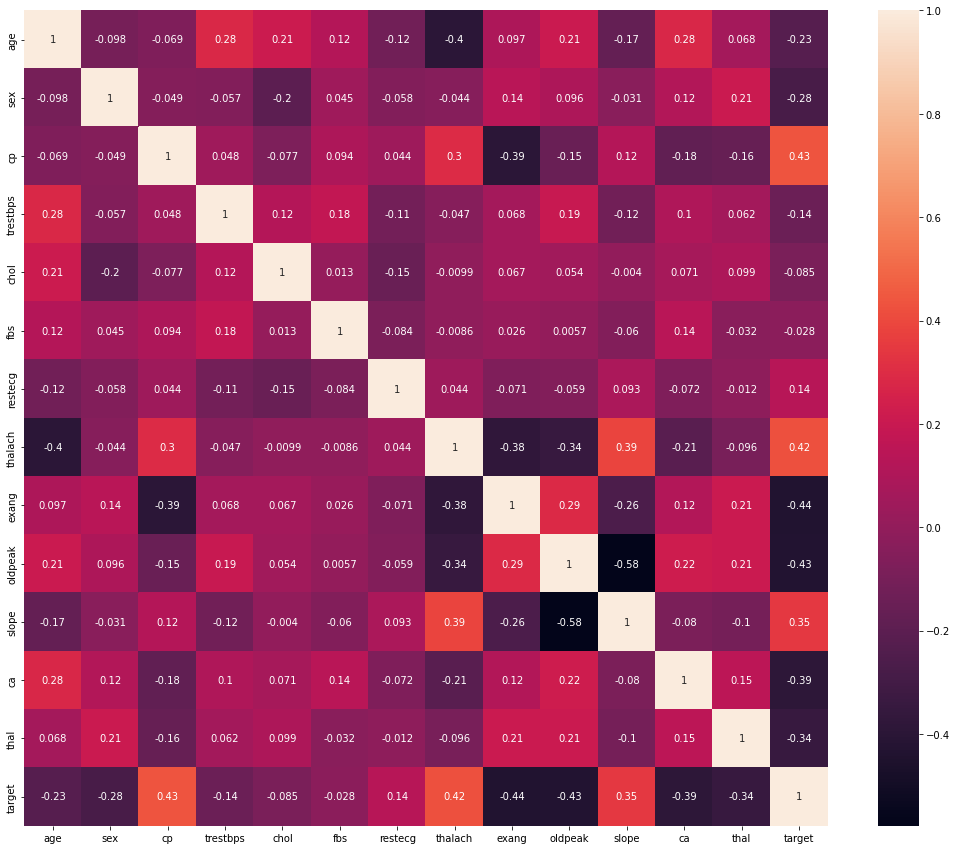

In [71]:
plt.figure(figsize=(18,15))
mask = np.triu(np.ones_like(data.corr()))

sns.heatmap(data.corr(), annot=True)

plt.show()

<Figure size 864x864 with 0 Axes>

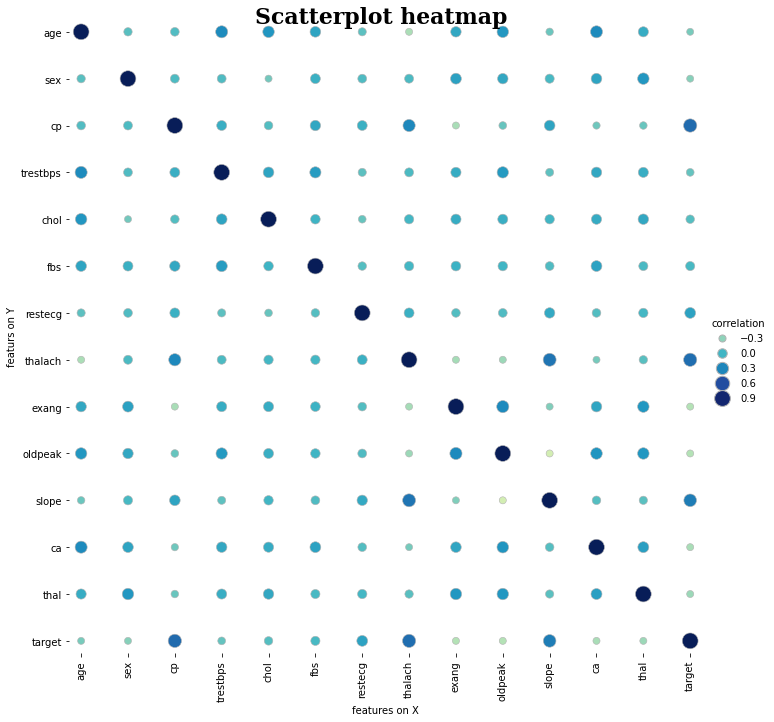

In [73]:

fig = plt.figure(figsize=(12,12))
corr_mat = data.corr().stack().reset_index(name="correlation")
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="YlGnBu", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)
g.set(xlabel="features on X", ylabel="featurs on Y", aspect="equal")
g.fig.suptitle('Scatterplot heatmap',fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")
plt.show()

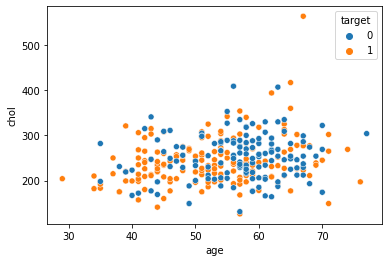

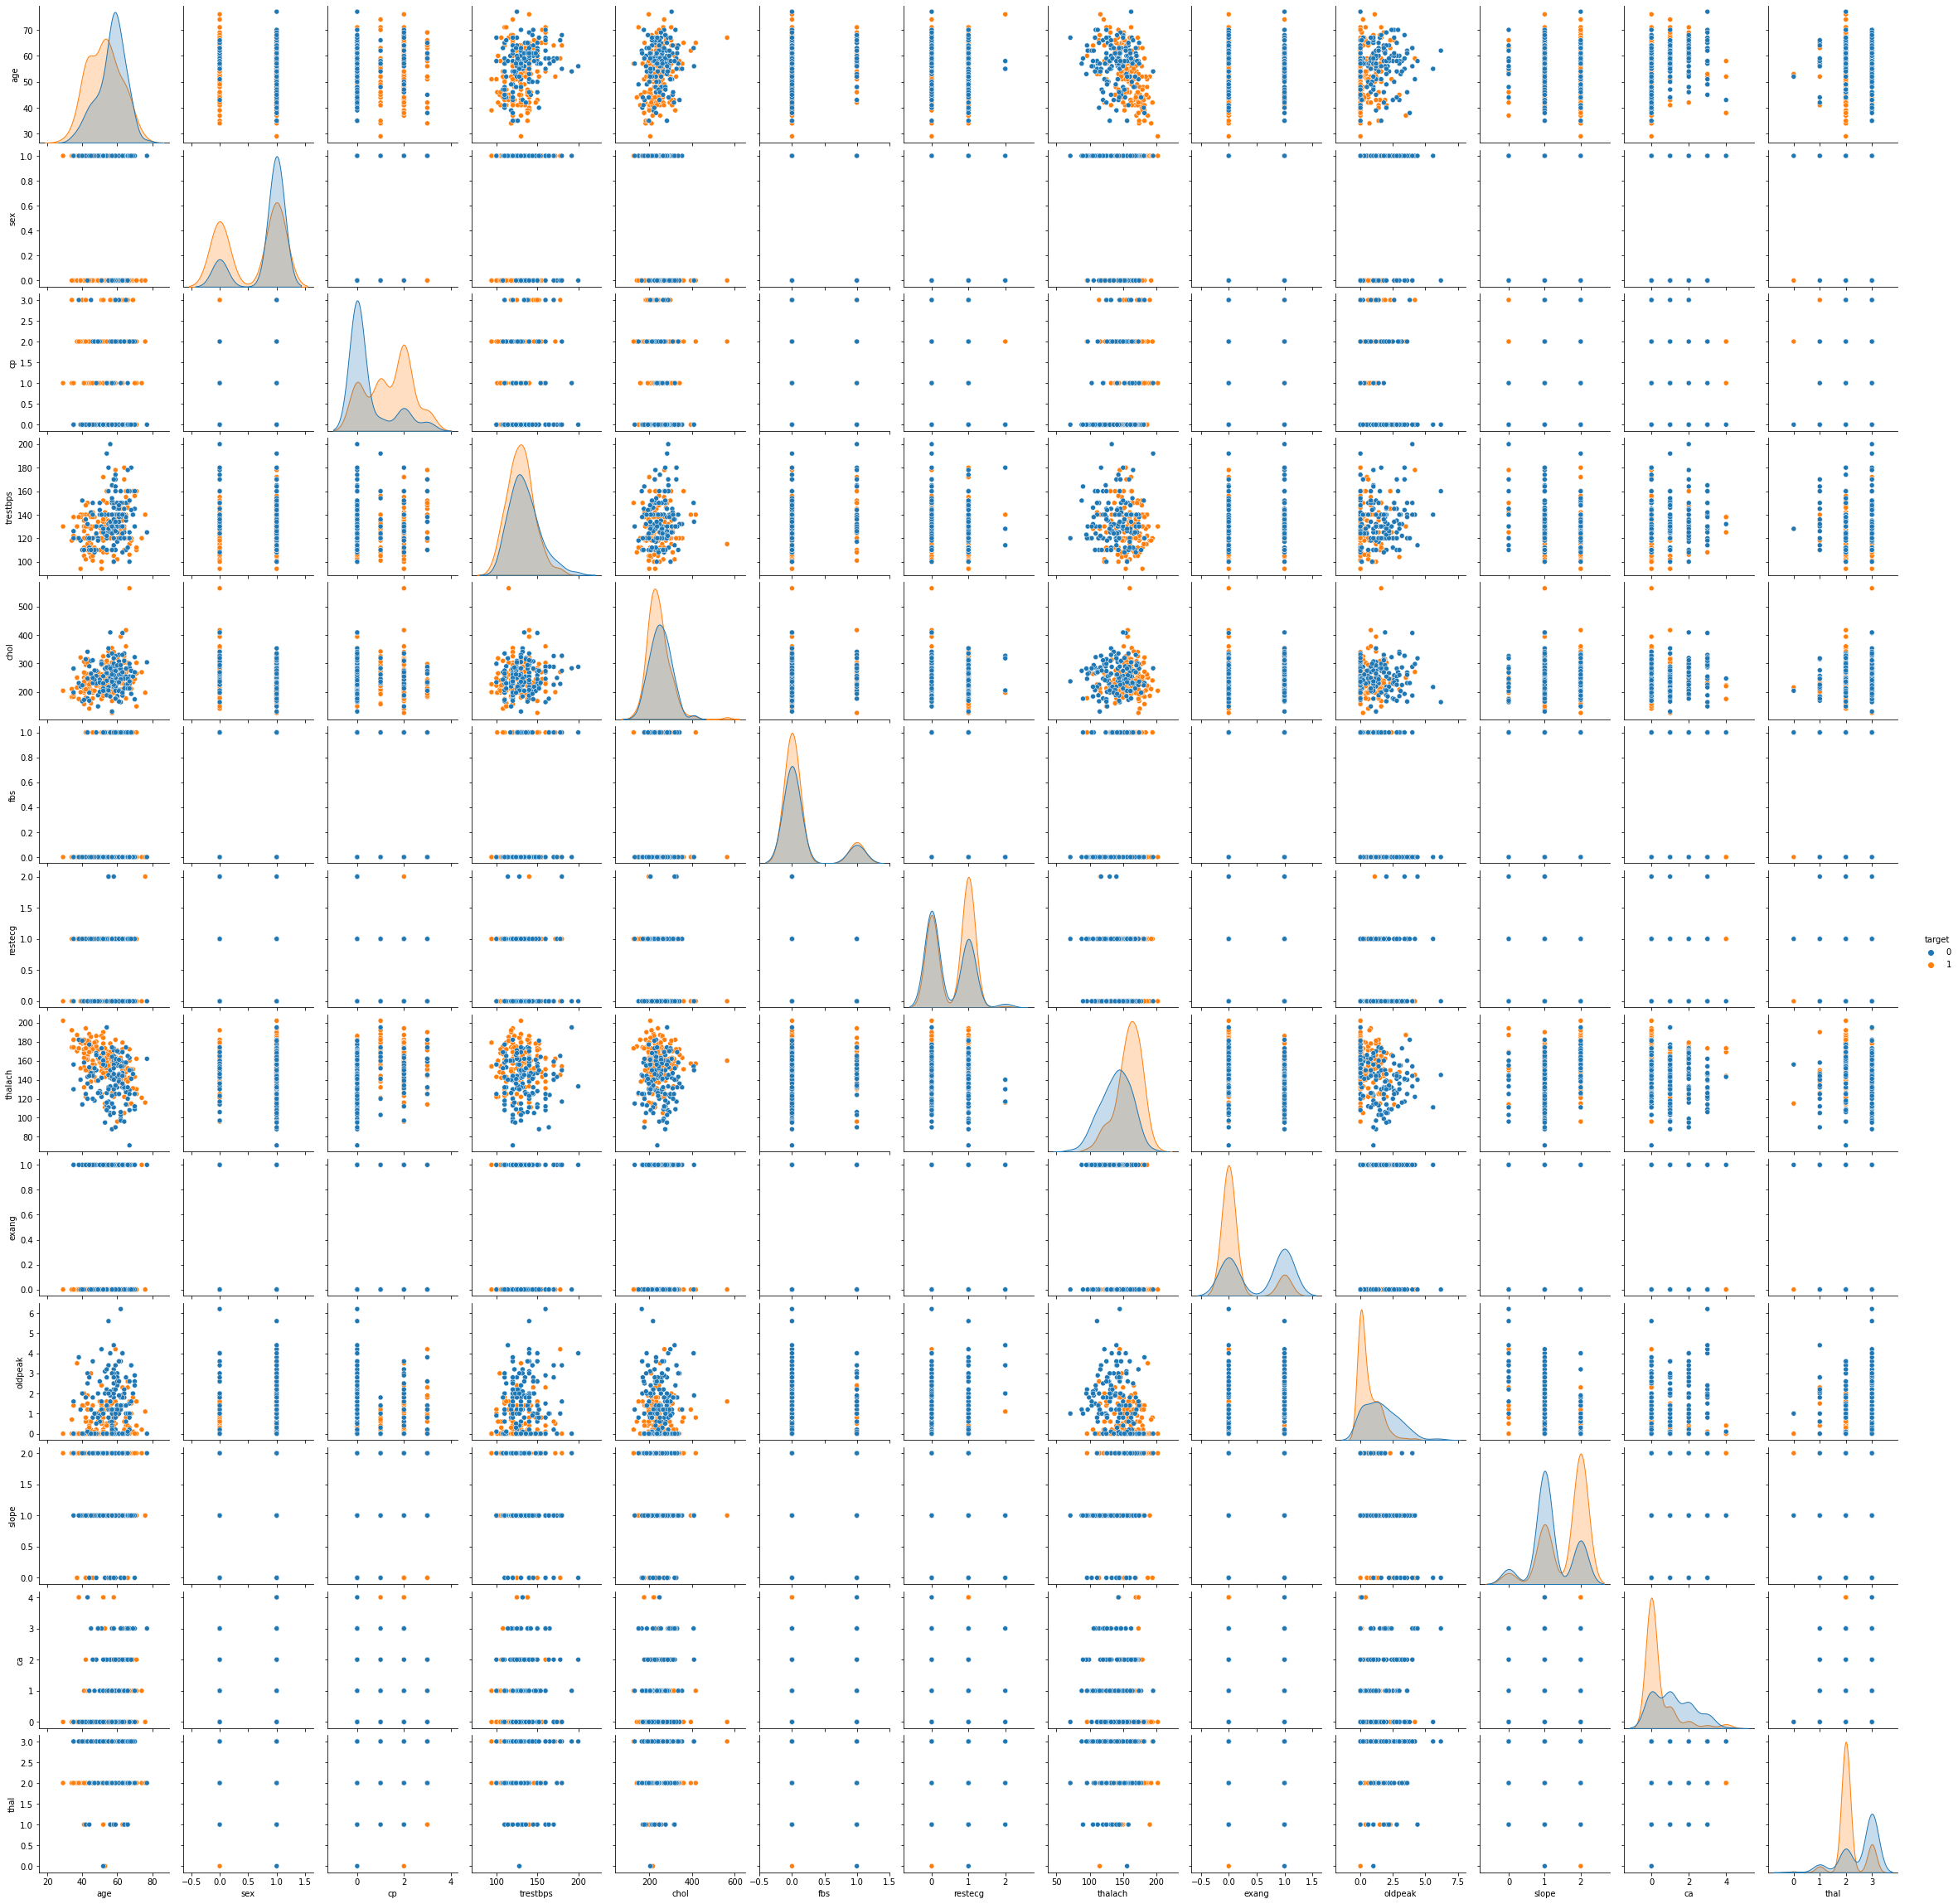

In [63]:
# Pair plot
sns.pairplot(data, hue='target')
plt.show()

### conclusion



> People with Non-Anginal chest pain, that is with cp = 2 have higher chances of heart attack.




> People with 0 major vessels, that is with caa = 0 have high chance of heart attack.




> People with sex = 1 have higher chance of heart attack.



> People with thall = 2 have much higher chance of heart attack.





> People with no exercise induced angina, that is with exng = 0 have higher chance of heart attack.



### fitting logistic regression model

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report, roc_curve

X = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

log = LogisticRegression()

log.fit(X_train, y_train)

y_pred_proba = log.predict_proba(X_test)

y_pred = np.argmax(y_pred_proba,axis=1)


The test accuracy score of Logistric Regression is  0.8852459016393442


### model performance

The test accuracy score of Logistric Regression is  0.8852459016393442


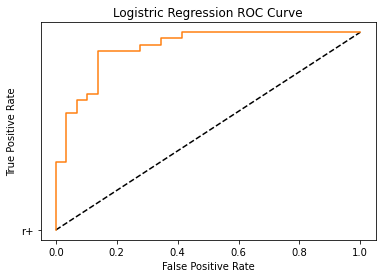

In [81]:
# printing the test accuracy
print("The test accuracy score of Logistric Regression is ", accuracy_score(y_test, y_pred))

y_pred_prob = log.predict_proba(X_test)[:,1]

# instantiating the roc_cruve
fpr,tpr,threshols=roc_curve(y_test,y_pred_prob)

# plotting the curve
plt.plot([0,1],[0,1],"k--",'r+')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistric Regression ROC Curve")
plt.show()






> the number of samples is limited, increasing it would result a better performance



### my model

In [84]:
# split the data into training and test set
X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit the model
clf = Logistic_Regression(lr=0.1, num_iter=300000)
clf.fit(X_train, y_train)

# predict 
y_pred_prob = clf.predict_prob(X_test)
y_pred = clf.predict(X_test, 0.5)



In [85]:
acc = accuracy_score(y_test,y_pred)
print(acc)

0.8688524590163934
